TODO

addded solver and base examples

In Episode 03, some potential problem solving strategies or heuristics. Fitted out with the  classes improved in Episode 04, let's try to solve the problem.

In this Episode will be focuse on exploring different technologies and check whether it is useful for solving this problem.

We willmost of time focus on 2x2 simple problems and assume that we know a solution to the problem. The latter will simplify the problem by allowing to check if the proposed solution aquals the expected solution instead of verifying if the solution works.

**Goals for this episode:**
- Try to solve the puzzle with classes defined in Episode 04
- List potential strategies or heuristics
- Evaluate by solving simple 2x2 problem with a known solution

exemple of polymorphism (play submit)

In [1]:
from episode04.board import BoardMark
from episode04.puzzle import Puzzle
from episode04.samples import clues2x2, clues5x5s, solution2x2, solution5x5s

import numpy as np

from episode05.gameengine import NonoGameEngine, SolvedNonoGameEngine
from episode05.solver import NonoSolver

In [2]:
class TryAndErrorSolver(NonoSolver):
    """Base class for solvers."""

    def __init__(self, a_game: NonoGameEngine):
        super().__init__(a_game)

    def solve(self):
        self.game.reset_trial()
        for row in range(self.puzzle.height):
            for col in range(self.puzzle.width):
                self.game.play(row, col, BoardMark.BLACK)


In [3]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

# solver
solver = TryAndErrorSolver(game2x2)
solver.solve()

# check result
game2x2.tracker.print_stats()

Nb trials: 1
Status: failed
1: 1 errors


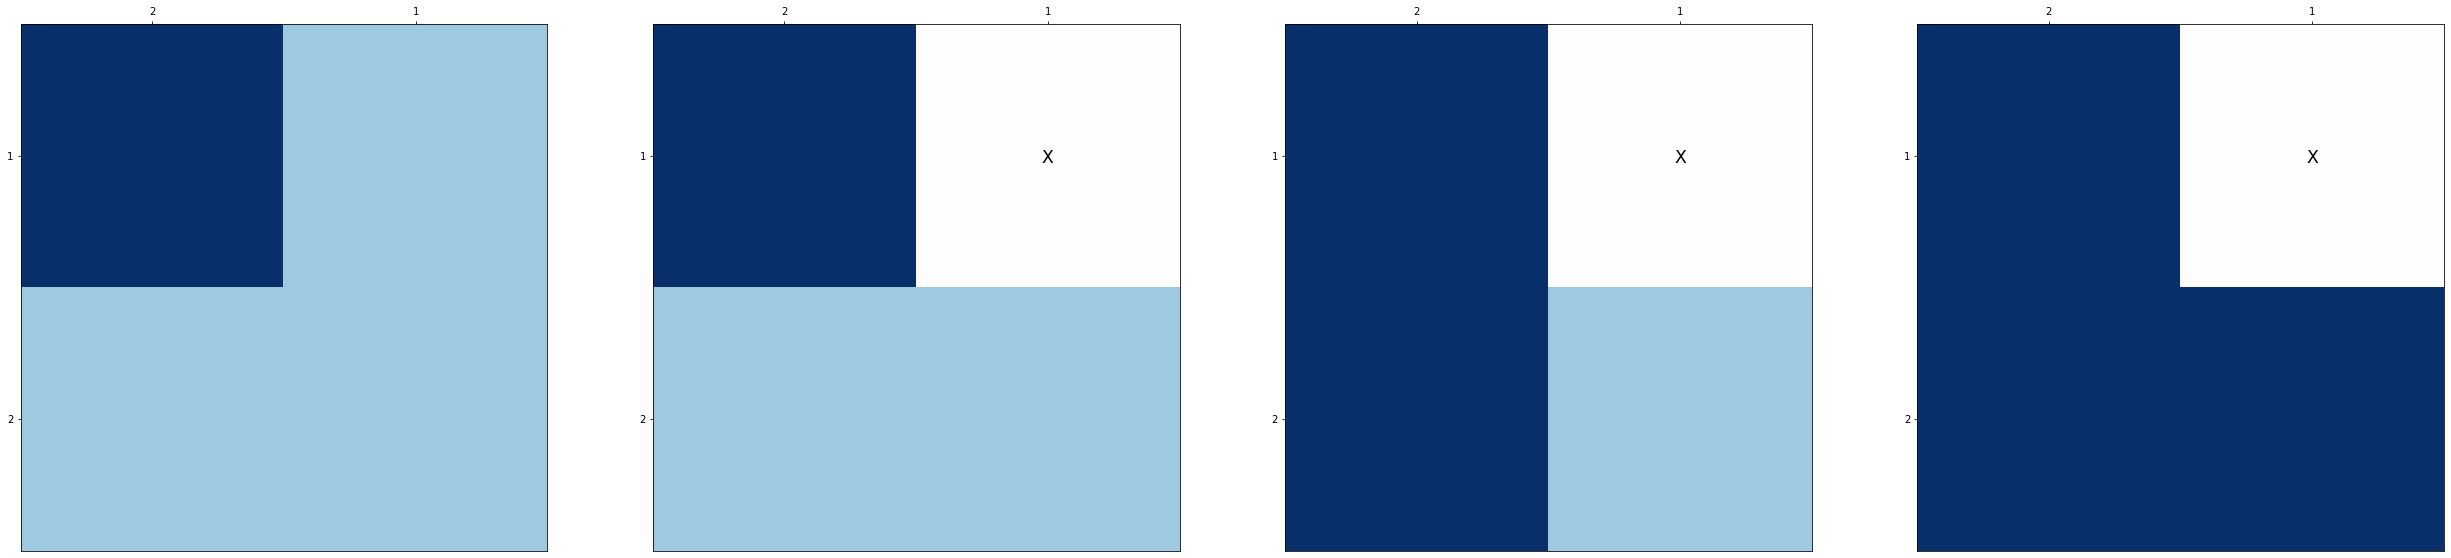

In [4]:
game2x2.show_all()


In [5]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = SolvedNonoGameEngine(puzzle5x5s, solution5x5s, track=True)

# solver
solver = TryAndErrorSolver(game5x5s)
solver.solve()

# check result
game5x5s.tracker.print_stats()

Nb trials: 1
Status: failed
1: 11 errors


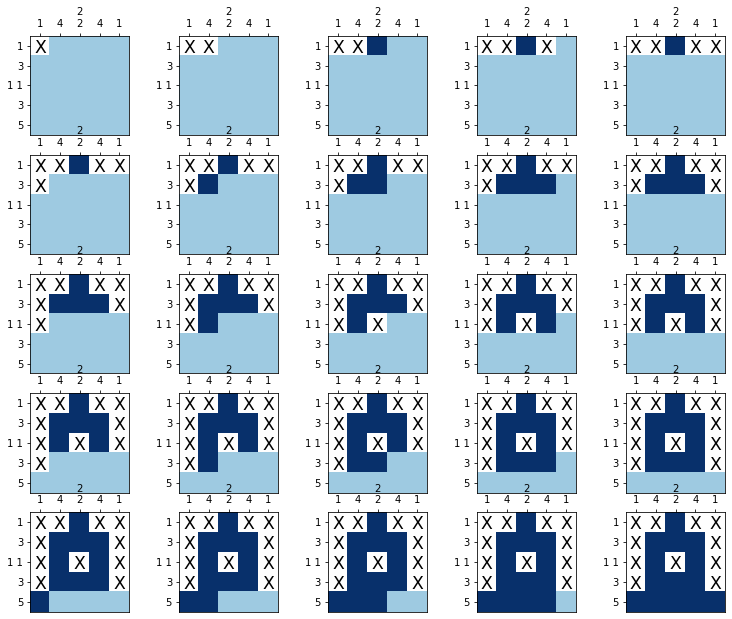

In [6]:
game5x5s.show_all()


In [7]:
from random import randint

class RandomSolver(NonoSolver):
    """Base class for solvers."""

    def __init__(self, a_game: NonoGameEngine, track=True):
        super().__init__(a_game)

    def solve(self):
        MAX_COUNT = 10
        while not self.game.is_solved() and self.game.nb_trials < MAX_COUNT:
            self.game.reset_trial()
            states = []
            for i in range(self.puzzle.height * self.puzzle.width):
                v = randint(0, 1)
                states.append(v)

            self.game.submit(states)


In [8]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

# solver
solver = RandomSolver(game2x2)
solver.solve()

# check result
game2x2.tracker.print_stats()

Nb trials: 2
Status: solved
1: 3 errors
2: 0 errors


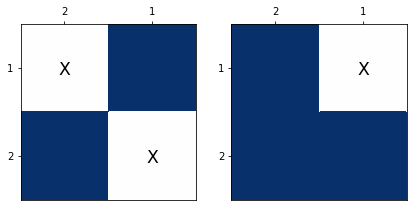

In [9]:
game2x2.show_all()


In [10]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = SolvedNonoGameEngine(puzzle5x5s, solution5x5s, track=True)

# solver
solver = RandomSolver(game5x5s)
solver.solve()

# check result
game5x5s.tracker.print_stats()

Nb trials: 9
Status: failed
1: 16 errors
2: 7 errors
3: 11 errors
4: 11 errors
5: 13 errors
6: 13 errors
7: 14 errors
8: 12 errors
9: 11 errors


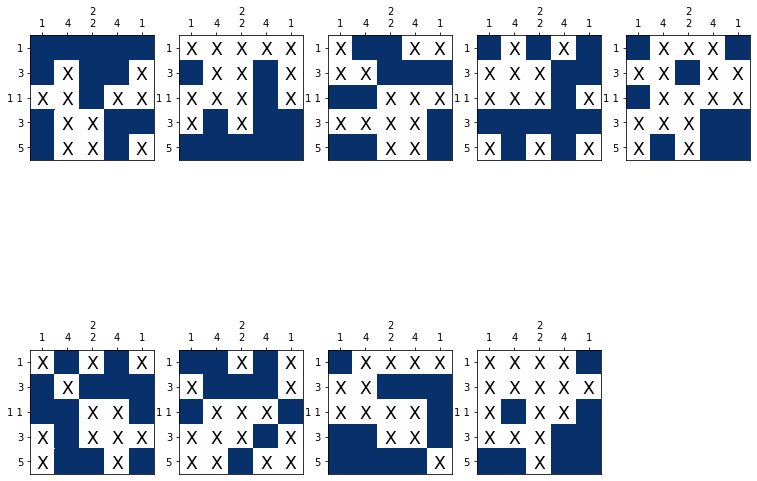

In [11]:
game5x5s.show_all()
